In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
#load training data
trainData = pd.read_json('C:/Users/Yutong Liu/Videos/data/processed/train.json')
testData = pd.read_json('C:/Users/Yutong Liu/Videos/data/processed/test.json')

In [16]:
# get the max and min pixel values in trainData
maxP = -100
minP = 0
listname = ["band_1","band_2"]
for i in range(2):
    for band in trainData[listname[i]]:
        band = np.array(band)
        if( np.max(band) > maxP):
            maxP = np.max(band)
        if(np.min(band)<minP):
            minP = np.min(band)
rangeP = maxP - minP

In [17]:
# Process Train data
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in trainData["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in trainData["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis], x_band2[:, :, :, np.newaxis]], axis=-1)
y_train = np.array(trainData["is_iceberg"])
print("Xtrain:", X_train.shape)

# Process Test data
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in testData["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in testData["band_2"]])
X_test = np.concatenate([x_band1[:, :, :, np.newaxis], x_band2[:, :, :, np.newaxis]], axis=-1)
print("Xtest:", X_test.shape)

Xtrain: (1604, 75, 75, 2)
Xtest: (8424, 75, 75, 2)


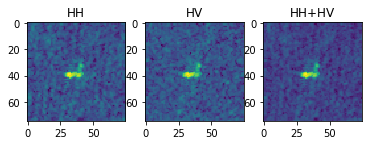

In [18]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.imshow(X_train[1,:,:,0])
plt.title('HH')
plt.subplot(1,3,2)
plt.imshow(X_train[1,:,:,1])
plt.title('HV')
plt.subplot(1,3,3)
plt.imshow(X_train[1,:,:,0]+X_train[1,:,:,1])
plt.title('HH+HV')
plt.show()

In [19]:
# rescale trainData where the components are between 1 and -1
X_train = X_train*(2/rangeP) - 1
# resize the train and test data to 2D
npix = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
nrow = X_train.shape[0]
Xnew = np.zeros((nrow,npix))
for i in range(nrow):
    Xnew[i,:] = X_train[i,:,:,:].reshape((1,npix))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
# split the dataset in two equal parts
Xtr,Xts,ytr,yts = train_test_split(Xnew,y_train,test_size=0.2,random_state=None)

model = svm.SVC(probability=False,kernel='rbf',C=1,gamma=0.01)
model.fit(Xtr,ytr)
yhat = model.predict(Xts)
acc = np.mean(yhat==yts)
print(acc)

0.806853582555


In [21]:
model = svm.SVC(probability=False,kernel='rbf',C=10,gamma=0.01)
model.fit(Xtr,ytr)
yhat = model.predict(Xts)
acc = np.mean(yhat==yts)
print(acc)

0.841121495327
